In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

In [46]:
from sklearn.metrics import accuracy_score, precision_score

In [47]:
train_data=pd.read_csv("../data/titanic/new_train_data.csv")
test_data=pd.read_csv("../data/titanic/new_test_data.csv")
test_ids = test_data['PassengerId']
test_data=test_data.drop('PassengerId',axis=1)

In [48]:
data=pd.read_csv("../data/titanic/test.csv")

In [50]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']
X_test = test_data
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [51]:
print("NaN test_data:", test_data.isna().sum().sum())
print("Columns:")
print(test_data.isna().sum()[test_data.isna().sum() > 0])

NaN test_data: 1
Columns:
Fare    1
dtype: int64


In [52]:
print("NaN train_data:", train_data.isna().sum().sum())
print("Columns:")
print(train_data.isna().sum()[train_data.isna().sum() > 0])

NaN train_data: 0
Columns:
Series([], dtype: int64)


In [53]:
fare_median = train_data['Fare'].median()
test_data['Fare'].fillna(fare_median, inplace=True)
print(test_data['Fare'].isnull().sum()) 

0


### Logistic Regression

model

In [54]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X, y)
y_pred_log = log_reg.predict(X_test)

In [65]:
C_values = np.logspace(-3, 3, 10)

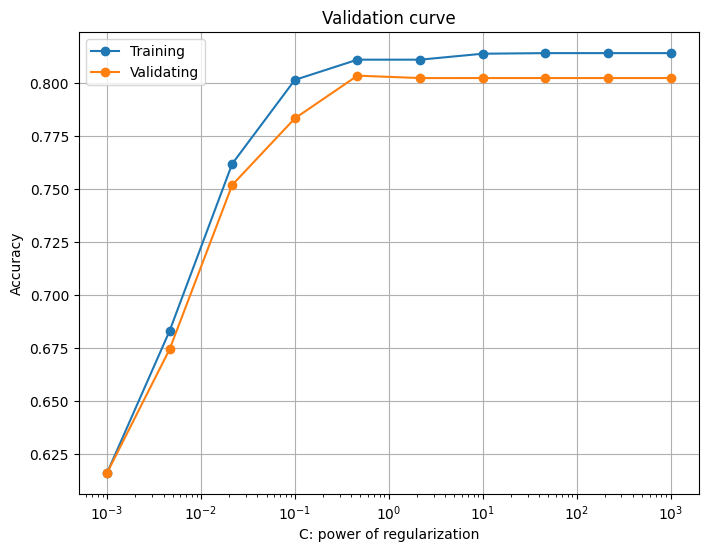

In [69]:
train_scores, valid_scores = validation_curve(
    LogisticRegression(max_iter=1000, random_state=42),
    X, y,
    param_name="C",
    param_range=C_values,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(C_values, train_mean, 'o-', label='Training')
plt.plot(C_values, valid_mean, 'o-', label='Validating')
plt.xscale('log')
plt.xlabel('C: power of regularization')
plt.ylabel('Accuracy')
plt.title('Validation curve')
plt.legend()
plt.grid(True)
plt.show()

metrics

In [55]:
# acc = accuracy_score(y, y_pred_log)
# prec = precision_score(y, y_pred_log)

### RandomForest

model

In [56]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X, y)
y_pred_rf = rf.predict(X_test)

metrics

In [57]:
# acc = accuracy_score(y, y_pred_rf)
# prec = precision_score(y, y_pred_rf)

### Predictions

In [58]:
data=pd.read_csv("../data/titanic/test.csv")
passenger_ids = data['PassengerId']
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': y_pred_rf
})
submission.to_csv('../data/titanic/submission_rf.csv', index=False)

In [59]:
data=pd.read_csv("../data/titanic/test.csv")
passenger_ids = data['PassengerId']
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': y_pred_log
})
submission.to_csv('../data/titanic/submission_log.csv', index=False)